In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img_array = []
for i in range(0,360,5):
    img = cv.imread(r'C:\Users\ASUS\Desktop\ComputerVision\scene_change_detection\COIL\coil-100\coil-100\obj1__'+str(i)+'.png')
    assert img is not None, "file could not be read, check with os.path.exists()"
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (0,40,470,300)
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    img_array.append(img)
# plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
first_image = cv.imread(r'C:\Users\ASUS\Desktop\ComputerVision\scene_change_detection\COIL\coil-100\coil-100\obj1__190.png')

In [ ]:
for img in img_array:
    plt.imshow(img),plt.colorbar(),plt.show()

In [4]:
im1 = img_array[0]
im2 = img_array[10]

im1_gray = cv.cvtColor(im1,cv.COLOR_BGR2GRAY)
im2_gray = cv.cvtColor(im2,cv.COLOR_BGR2GRAY)

sz = im1.shape

# warp_mode = cv.MOTION_TRANSLATION
warp_mode = cv.MOTION_EUCLIDEAN
# print("Warp Mode: ",warp_mode)

if warp_mode == cv.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    
number_of_iterations = 5000;

termination_eps = 1e-10;

criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

(cc, warp_matrix) = cv.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv.MOTION_HOMOGRAPHY :
    im2_aligned = cv.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv.INTER_LINEAR + cv.WARP_INVERSE_MAP)
else:
    im2_aligned = cv.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv.INTER_LINEAR + cv.WARP_INVERSE_MAP)

print("Correlation coefficient:",cc)    
    
cv.imshow("Image 1", im1)
cv.imshow("Image 2", im2)
cv.imshow("Aligned Image 2", im2_aligned)
cv.imshow("Testing",img_array[0])
cv.waitKey(0)

# print(im2_aligned)

Correlation coefficient: 0.8364459829980219


-1

In [18]:
import pywt
gray_image = cv.cvtColor(im2_aligned, cv.COLOR_BGR2GRAY)
(cA,(cH,cV,cD)) = pywt.dwt2(gray_image , 'haar')
print("Approximation coefficients:\n", cA)
print("Horizontal detail coefficients:\n", cH)
print("Vertical detail coefficients:\n", cV)
print("Diagonal detail coefficients:\n", cD)

Approximation coefficients:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Horizontal detail coefficients:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Vertical detail coefficients:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Diagonal detail coefficients:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(-0.5, 63.5, 63.5, -0.5)

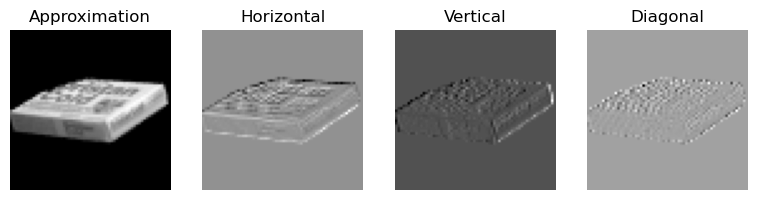

In [20]:
images = [cA,cH,cV,cD]
fig = plt.figure(figsize=(12, 3))
# Approximation
fig.add_subplot(1, 5, 1)
plt.imshow(images[0], cmap='gray')
plt.title("Approximation")
plt.axis('off')

#Horizontal detail
fig.add_subplot(1, 5, 2)
plt.imshow(images[1], cmap='gray')
plt.title("Horizontal")
plt.axis('off')

#Vertical detail
fig.add_subplot(1, 5, 3)
plt.imshow(images[2], cmap='gray')# Shows an image
plt.title("Vertical")
plt.axis('off')

#Diagonal detail
fig.add_subplot(1, 5, 4)
plt.imshow(images[3], cmap='gray')# Shows an image
plt.title("Diagonal")
plt.axis('off')

In [ ]:
tiles1 = [im1[x:x+32,y:y+32] for x in range(0,im1.shape[0],32) for y in range(0,im1.shape[1],32)]
tiles2 = [im2[x:x+32,y:y+32] for x in range(0,im2.shape[0],32) for y in range(0,im2.shape[1],32)]